# Practical Guide to PCA
#### Gabriel Hassler


## PCA

In [34]:
import pandas as pd

data = pd.read_csv('/Users/keith/Documents/code/Intro to ML 2025/data/processed/pca_input.csv', dtype={'GEOID': str})

# county-level data

print(data.head())



   GEOID  EP_POV150  EP_UNEMP  EP_HBURD  EP_NOHSDP  EP_UNINSUR  EP_AGE65  \
0  01001      0.202     0.028     0.197      0.096       0.074     0.156   
1  01003      0.183     0.034     0.232      0.084       0.093     0.212   
2  01005      0.377     0.058     0.251      0.235       0.107     0.198   
3  01007      0.290     0.087     0.232      0.211       0.084     0.168   
4  01009      0.229     0.060     0.194      0.182       0.102     0.183   

   EP_AGE17  EP_DISABL  EP_SNGPNT  EP_LIMENG  EP_MUNIT  EP_MOBILE  EP_CROWD  \
0     0.234      0.164      0.056      0.004     0.039      0.156     0.014   
1     0.212      0.139      0.042      0.008     0.166      0.102     0.019   
2     0.207      0.181      0.113      0.020     0.014      0.292     0.038   
3     0.212      0.196      0.072      0.003     0.027      0.306     0.013   
4     0.230      0.170      0.053      0.022     0.009      0.239     0.023   

   EP_NOVEH  EP_GROUPQ  EP_NOINT  med_income  med_homeval  
0     0.

## Attempt 1

In [35]:
from sklearn.decomposition import PCA

X = data.drop(columns=['GEOID'])
X.index = data['GEOID']
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Attempt 2: Dealing with missing data

In [ ]:
mis_percs = X.isnull().mean()

# shows just the mean
# mis_percs = X.mean()

print(mis_percs)

# similiar values from 

EP_POV150      0.026700
EP_UNEMP       0.026700
EP_HBURD       0.026700
EP_NOHSDP      0.026700
EP_UNINSUR     0.026700
EP_AGE65       0.026700
EP_AGE17       0.026700
EP_DISABL      0.026700
EP_SNGPNT      0.026700
EP_LIMENG      0.026700
EP_MUNIT       0.026700
EP_MOBILE      0.026700
EP_CROWD       0.026700
EP_NOVEH       0.026700
EP_GROUPQ      0.026700
EP_NOINT       0.026700
med_income     0.000310
med_homeval    0.000931
dtype: float64


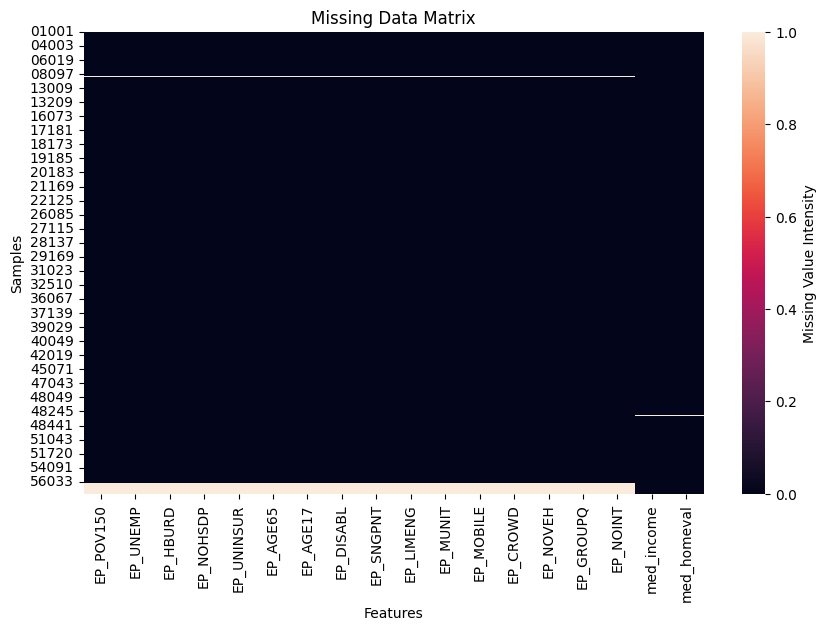

In [ ]:
# plot missing data matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(X.isnull(), cbar=True, cbar_kws={'label': 'Missing Value Intensity'})
plt.title('Missing Data Matrix')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

# imputation can bias PCA results if missingness is not random which is an issue if you 
# have a lot of missing data and use mean imputation
# better to just drop those rows; high relationship between missingness and value can skew PCA directions

## added in a barplot to show missing data counts for fun

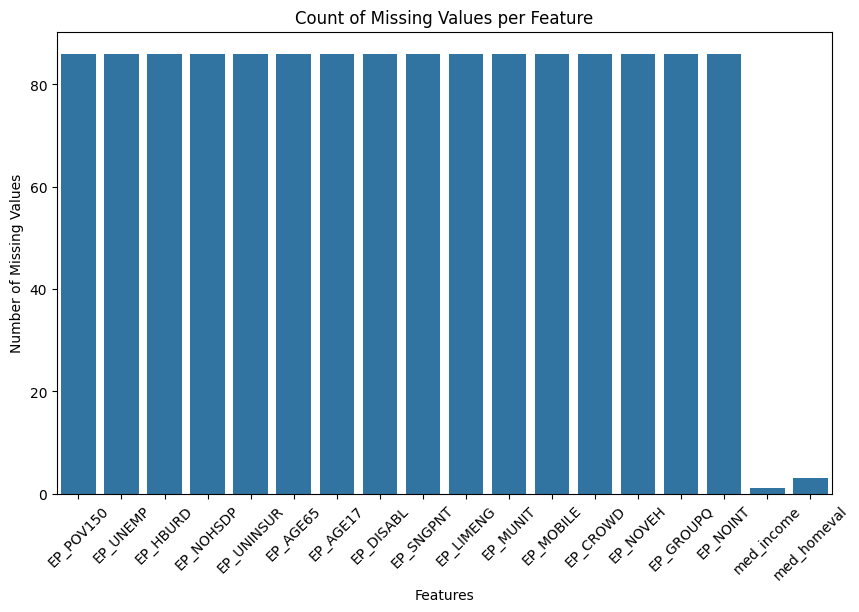

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'X' is your DataFrame

plt.figure(figsize=(10, 6))
# 1. Calculate the sum of missing values for each column
missing_counts = X.isnull().sum()

# 2. Create a bar plot of the counts
sns.barplot(x=missing_counts.index, y=missing_counts.values)

plt.title('Count of Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45) # Rotate x-axis labels if they overlap
plt.show()

## back to in class example

In [ ]:
# drop missing values
X_dropped = X.dropna()
pca_dropped = PCA(n_components=10)
X_pca_dropped = pca_dropped.fit_transform(X_dropped)

# Eigenvectors as matrix
print("PCA Components after dropping missing values:")
print(pca_dropped.components_)

PCA Components after dropping missing values:
[[-3.87599435e-07 -2.45723249e-08  9.76920659e-08 -1.81906426e-07
  -1.05833691e-07 -6.09164118e-08 -4.24660116e-08 -1.93605442e-07
  -4.11186393e-08  5.48879246e-08  3.11039361e-07 -3.25869602e-07
   2.71754357e-08 -2.49292212e-09 -4.65192609e-08 -3.57722147e-07
   1.08006641e-01  9.94150173e-01]
 [-5.17740838e-06 -8.97578644e-07 -2.20627445e-06 -1.99557475e-06
  -1.14742497e-06 -1.01247976e-06  8.52936572e-07 -1.95629244e-06
  -4.28436567e-07 -1.25860741e-07  4.12265549e-08 -3.42674916e-06
  -3.26312388e-07 -1.22261728e-06 -4.20973386e-07 -2.84378445e-06
   9.94150172e-01 -1.08006641e-01]
 [ 2.70458933e-01  6.33397565e-02 -1.00813327e-01  3.51572526e-01
   2.47649406e-01 -1.07717665e-01  7.66350981e-02  8.57783429e-02
   5.31143688e-02  6.72916672e-02 -1.72569404e-01  7.57064661e-01
   7.81967062e-02  1.26488728e-02  2.88196432e-02  2.92451008e-01
   5.76492787e-06 -2.20164174e-10]
 [-3.58639489e-01 -9.10931954e-02 -2.87796593e-01 -2.5246

This is a little hard to interpret.
Let's make a function to visualize the PCA components.

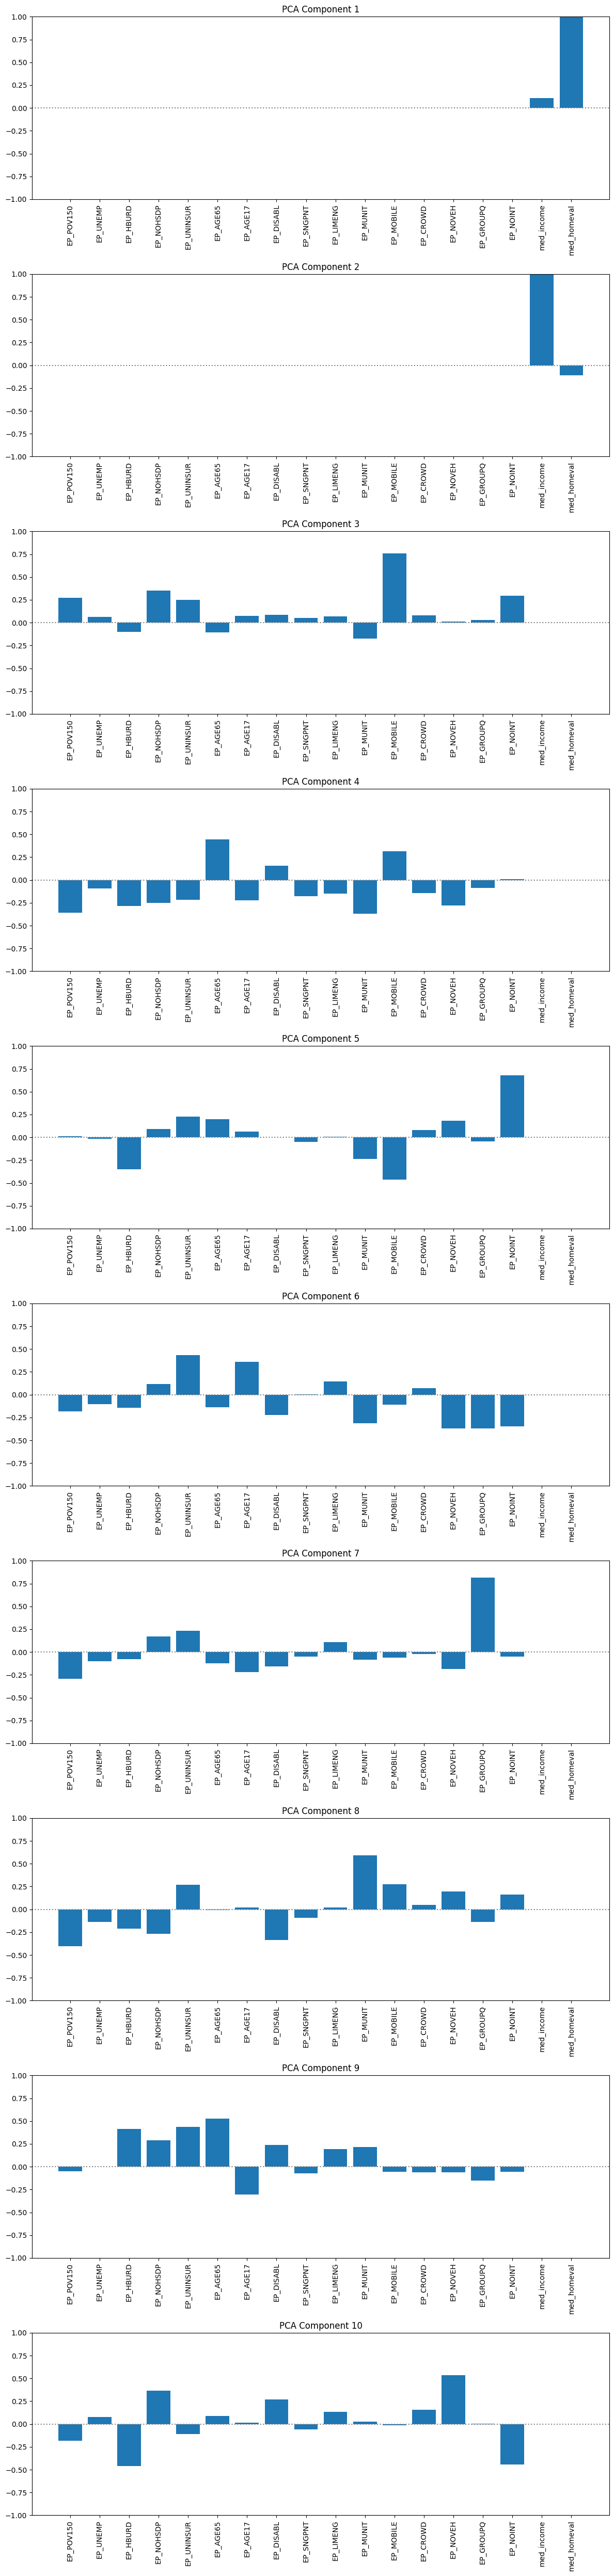

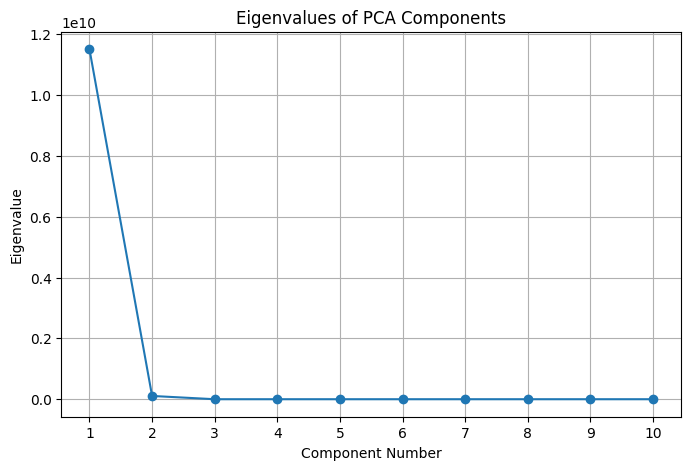

In [ ]:
def visualize_pca(pca, feature_names):
    components = pca.components_
    num_components = components.shape[0]

    plt.figure(figsize=(12, num_components * 5))  # Adjust height based on number of components
    for i in range(num_components):
        plt.subplot(num_components, 1, i + 1)  # Change subplot configuration
        plt.bar(range(len(feature_names)), components[i])
        plt.xticks(range(len(feature_names)), feature_names, rotation=90)
        plt.ylim(-1, 1)
        plt.axhline(0, color='gray', linestyle='dotted')  # Add a dotted line at y=0
        plt.title(f'PCA Component {i+1}')
    plt.tight_layout()
    plt.show()

def visualize_eigvals(pca):
    eigvals = pca.explained_variance_
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(eigvals) + 1), eigvals, marker='o')
    plt.title('Eigenvalues of PCA Components')
    plt.xlabel('Component Number')
    plt.ylabel('Eigenvalue')
    plt.xticks(range(1, len(eigvals) + 1))
    plt.grid()
    plt.show()

visualize_pca(pca_dropped, X.columns)
visualize_eigvals(pca_dropped)

PCA tries to find the directions of maximum variance in the data.
Let's look at the variance of each variable in our dataset.

In [ ]:
var_X = X_dropped.var()
print("Variance of each variable:")
print(var_X)

Variance of each variable:
EP_POV150      7.018149e-03
EP_UNEMP       6.116665e-04
EP_HBURD       2.554523e-03
EP_NOHSDP      3.178768e-03
EP_UNINSUR     2.579806e-03
EP_AGE65       2.335207e-03
EP_AGE17       1.237812e-03
EP_DISABL      2.064093e-03
EP_SNGPNT      5.854613e-04
EP_LIMENG      6.557523e-04
EP_MUNIT       3.533768e-03
EP_MOBILE      8.777237e-03
EP_CROWD       5.405316e-04
EP_NOVEH       1.960613e-03
EP_GROUPQ      1.867977e-03
EP_NOINT       5.133503e-03
med_income     2.403354e+08
med_homeval    1.137113e+10
dtype: float64


## Attempt 3: Dealing with scaling



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dropped)


var_X_scaled = pd.DataFrame(X_scaled, columns=X_dropped.columns).var()
print("Variance of each variable after scaling:")
print(var_X_scaled)


Variance of each variable after scaling:
EP_POV150      1.000319
EP_UNEMP       1.000319
EP_HBURD       1.000319
EP_NOHSDP      1.000319
EP_UNINSUR     1.000319
EP_AGE65       1.000319
EP_AGE17       1.000319
EP_DISABL      1.000319
EP_SNGPNT      1.000319
EP_LIMENG      1.000319
EP_MUNIT       1.000319
EP_MOBILE      1.000319
EP_CROWD       1.000319
EP_NOVEH       1.000319
EP_GROUPQ      1.000319
EP_NOINT       1.000319
med_income     1.000319
med_homeval    1.000319
dtype: float64


PCA Components after scaling:


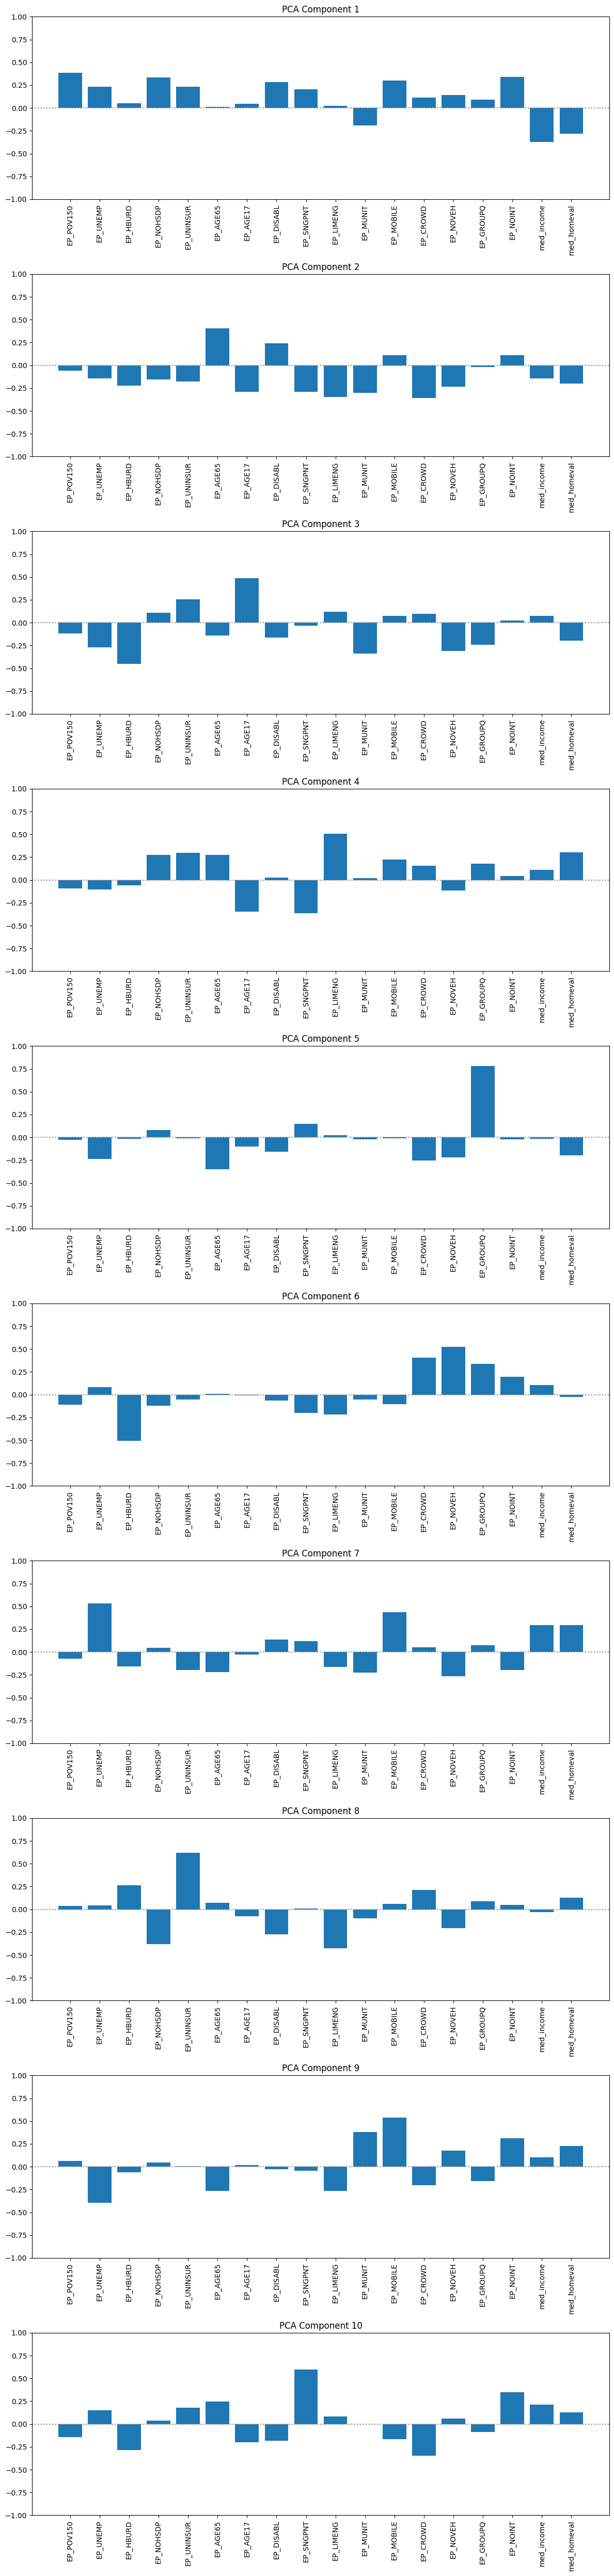

Eigenvalues after scaling:


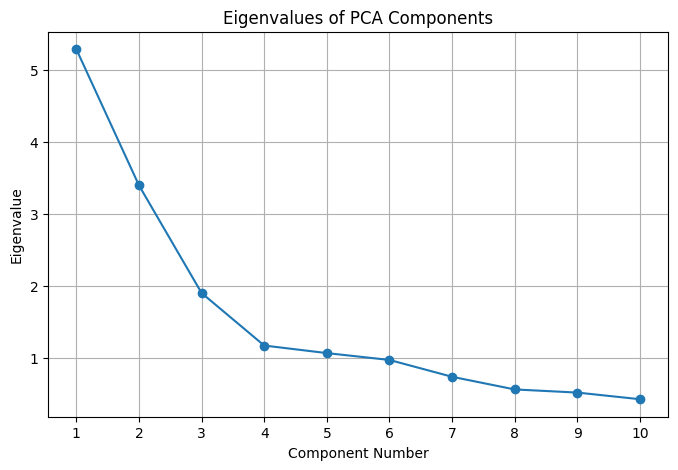

In [ ]:
pca_scaled = PCA(n_components=10)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

print("PCA Components after scaling:")
visualize_pca(pca_scaled, X_dropped.columns)
print("Eigenvalues after scaling:")
visualize_eigvals(pca_scaled)

## How to choose the number of components to include in downstream analyses?
1. Scree plot
2. Cumulative explained variance plot
3. Kaiser criterion (keep components with eigenvalues > 1)
4. Cross validation
5. Domain knowledge

### Scree Plot

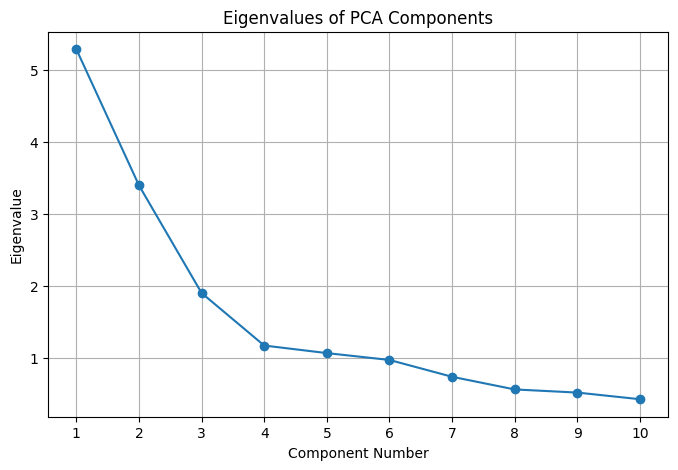

In [ ]:
visualize_eigvals(pca_scaled)


### Cumulative Explained Variance Plot



In [ ]:
var_explained = pca_scaled.explained_variance_ratio_
cumulative_var_explained = var_explained.cumsum()

df = pd.DataFrame({
    'Component': range(1, len(var_explained) + 1),
    'Variance Explained': var_explained,
    'Cumulative Variance Explained': cumulative_var_explained
})
print(df)

   Component  Variance Explained  Cumulative Variance Explained
0          1            0.293346                       0.293346
1          2            0.188470                       0.481816
2          3            0.105506                       0.587322
3          4            0.065031                       0.652353
4          5            0.059221                       0.711574
5          6            0.053927                       0.765502
6          7            0.040966                       0.806467
7          8            0.031216                       0.837683
8          9            0.028795                       0.866478
9         10            0.023678                       0.890156


### Kaiser Criterion
Keep components with eigenvalues > 1.

In [ ]:
eigvals = pca_scaled.explained_variance_
print("Eigenvalues of PCA Components after scaling:")
print(eigvals)

Eigenvalues of PCA Components after scaling:
[5.2819076  3.39355035 1.8997071  1.17094065 1.06632283 0.97099995
 0.73762279 0.5620634  0.51847009 0.42633626]


### Cross Validation
This is complicated in PCA but doable.

### Domain Knowledge
Use your understanding of the data to inform your choice.

## Advanced PCA Topics: Rotation and Sparse PCA

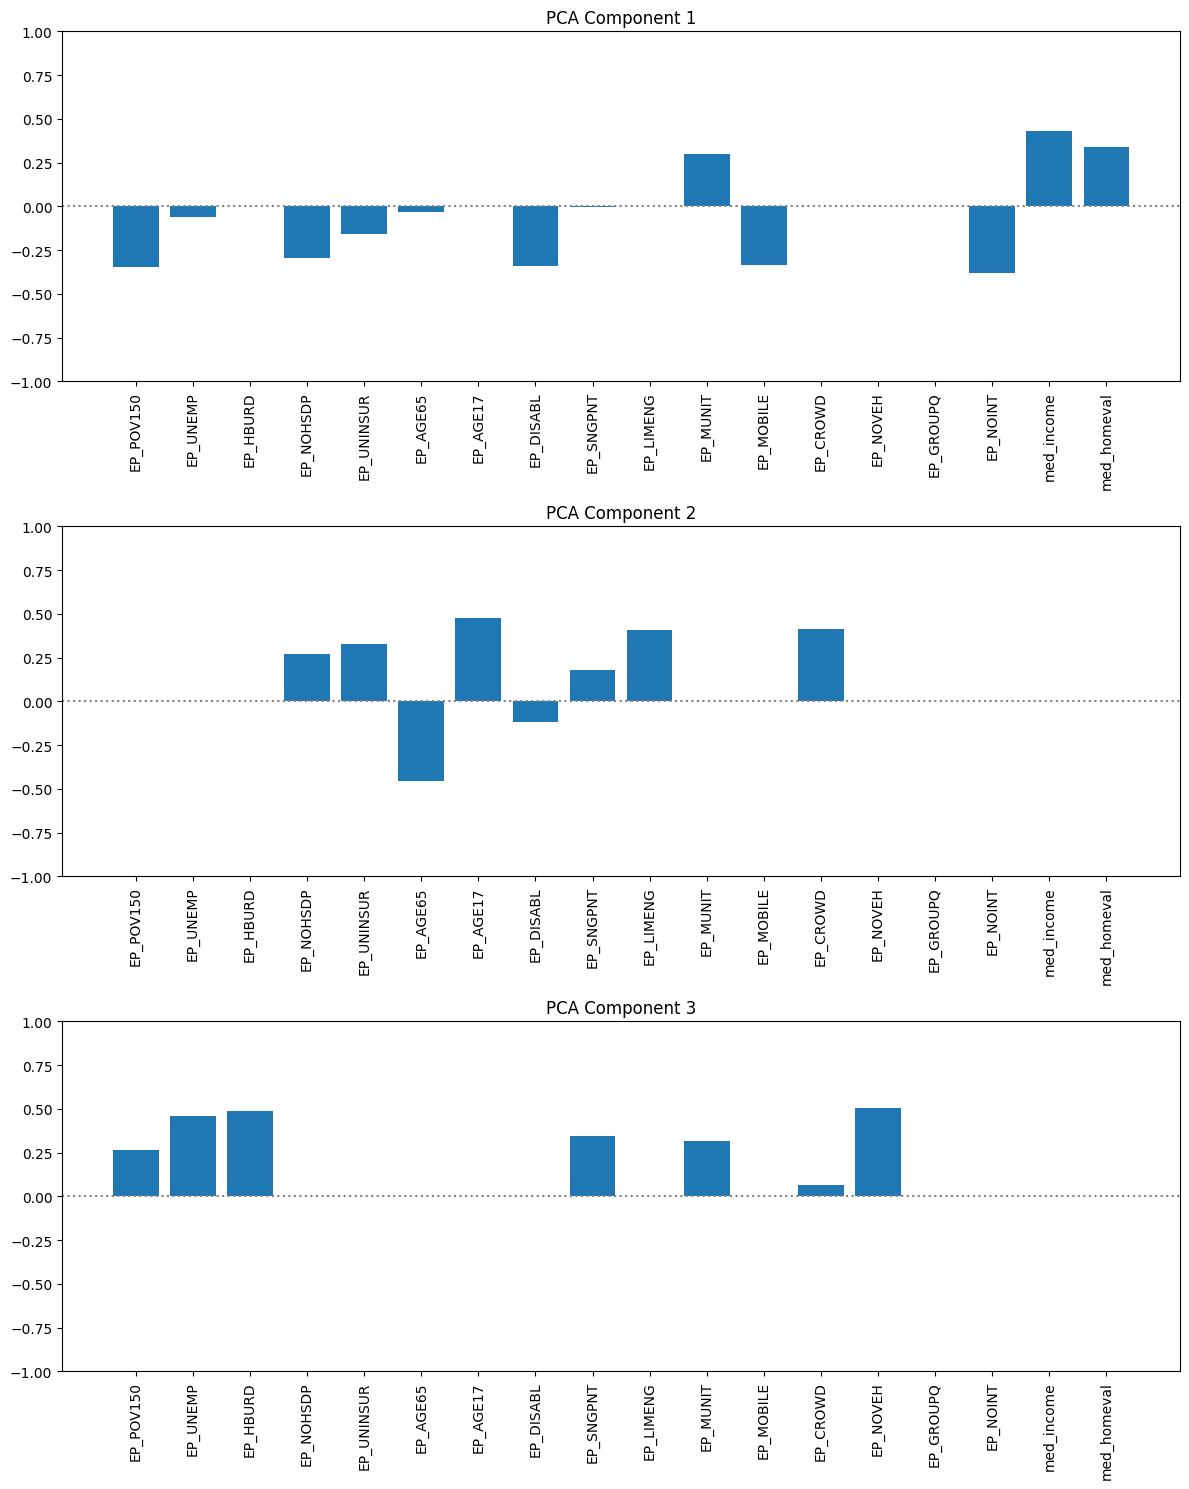

In [ ]:
# sparse PCA
from sklearn.decomposition import SparsePCA
sparse_pca = SparsePCA(n_components=3, alpha=10)
sparse_X_pca = sparse_pca.fit_transform(X_scaled)

visualize_pca(sparse_pca, X_dropped.columns)

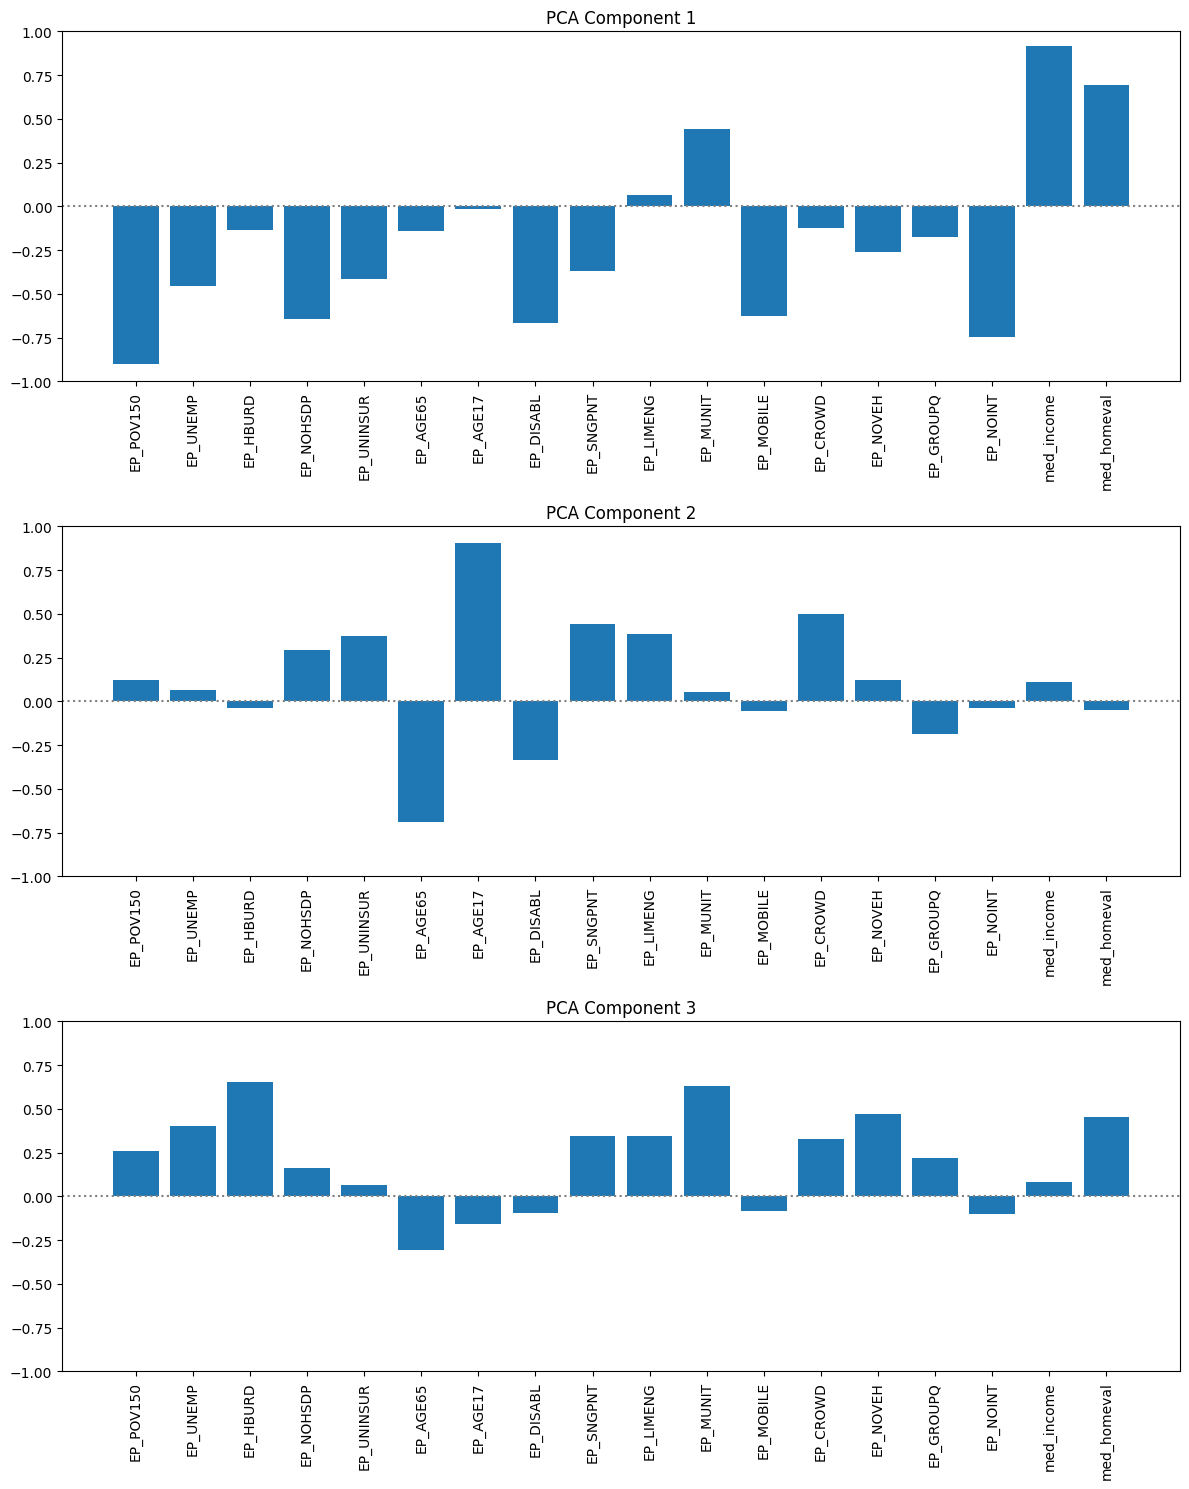

In [ ]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=3, rotation='quartimax')
X_fa = fa.fit_transform(X_scaled)

visualize_pca(fa, X_dropped.columns)

# Interpretation

/var/folders/hn/q1n1zrgn6zv2_d857__5lnhh0000gn/T/ipykernel_92375/1685425262.py:23: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  alaska_centroid = alaska.unary_union.centroid
/var/folders/hn/q1n1zrgn6zv2_d857__5lnhh0000gn/T/ipykernel_92375/1685425262.py:34: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  hawaii_centroid = hawaii.unary_union.centroid


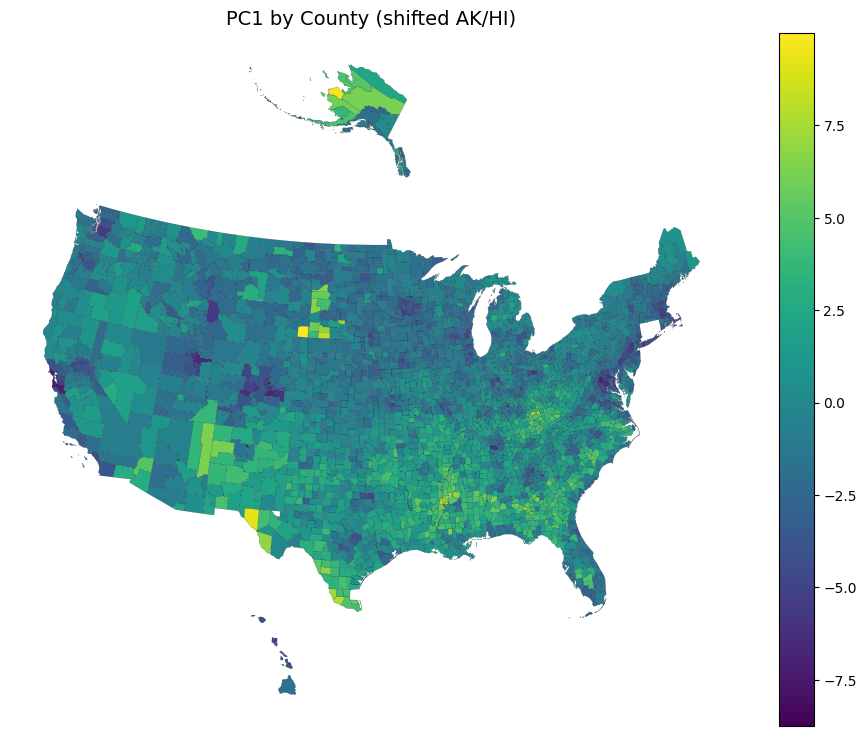

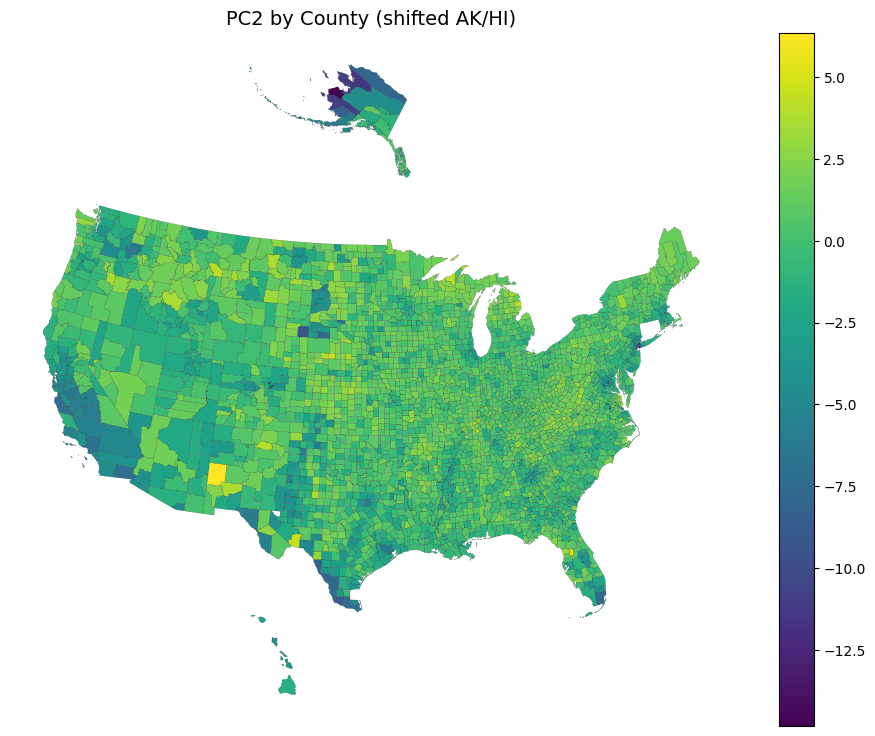

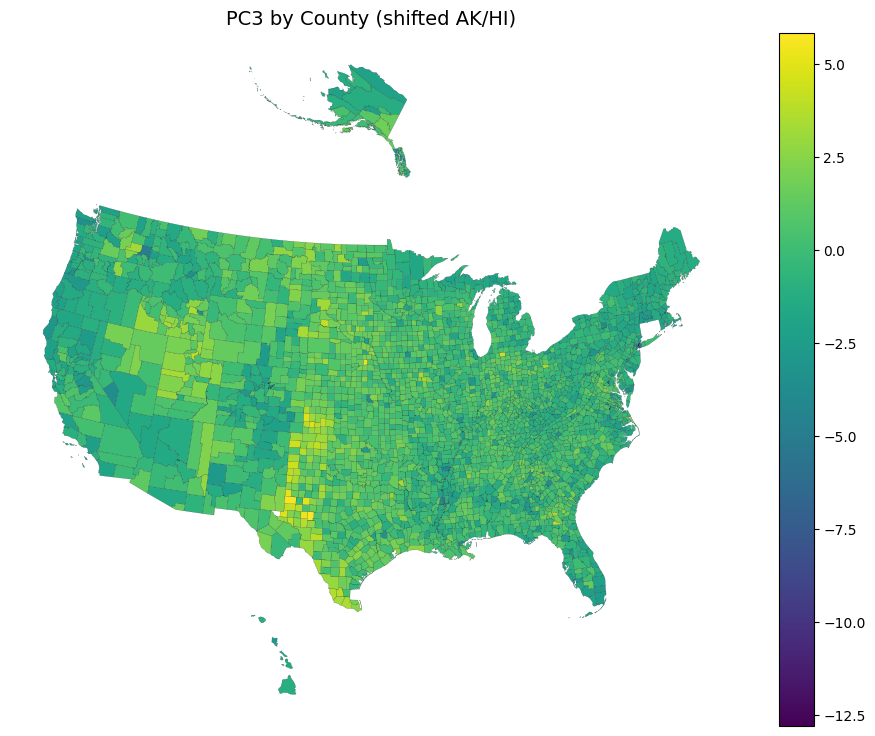

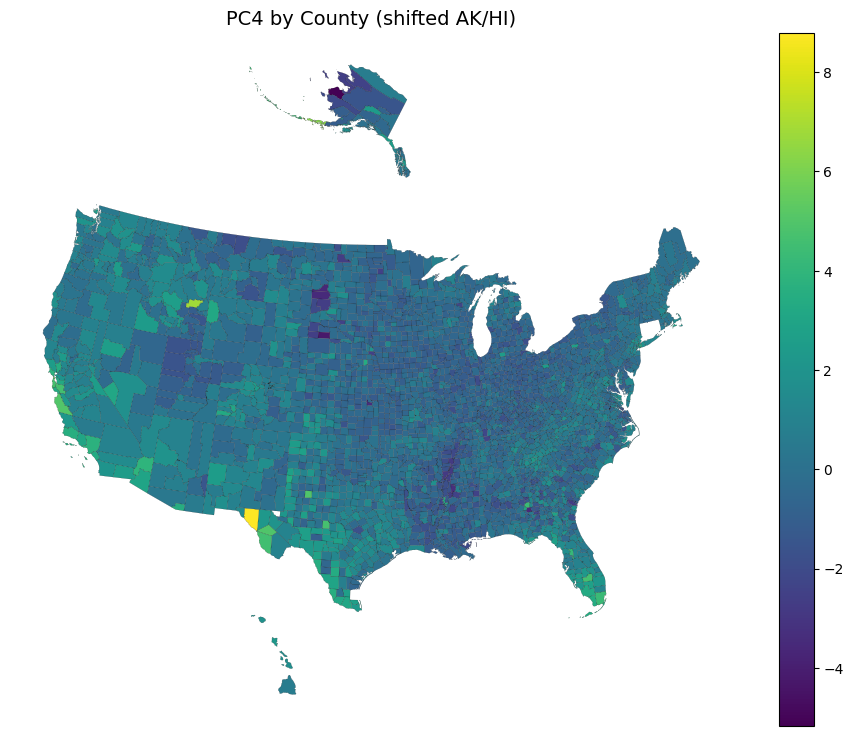

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import affinity

# Load county shapefile
counties = gpd.read_file("/Users/keith/Documents/code/Intro to ML 2025/data/raw/cb_2022_us_county_5m.zip")

# Project to an equal-area projection in meters
counties = counties.to_crs("EPSG:5070")

# Build PCA dataframe
X_pca_df = pd.DataFrame(X_pca_scaled, columns=[f'PC{i+1}' for i in range(X_pca_scaled.shape[1])])
X_pca_df['GEOID'] = X_dropped.index

# Separate Alaska, Hawaii, and continental US
alaska = counties[counties['STATEFP'] == '02'].copy()
hawaii = counties[counties['STATEFP'] == '15'].copy()
continental = counties[~counties['STATEFP'].isin(['02', '15', '72'])].copy()

# --- Move Alaska as a block ---
# Compute Alaska centroid to use as scaling origin
alaska_centroid = alaska.unary_union.centroid

# Scale and shift each geometry with the same parameters
alaska['geometry'] = alaska['geometry'].apply(
    lambda geom: affinity.scale(geom, xfact=0.35, yfact=0.35, origin=alaska_centroid)
)
alaska['geometry'] = alaska['geometry'].apply(
    lambda geom: affinity.translate(geom, xoff=3e6, yoff=-1.5e6)
)

# --- Move Hawaii as a block ---
hawaii_centroid = hawaii.unary_union.centroid
hawaii['geometry'] = hawaii['geometry'].apply(
    lambda geom: affinity.translate(geom, xoff=5.4e6, yoff=-1.8e6)
)

# Combine all back together
counties_shifted = pd.concat([continental, alaska, hawaii], ignore_index=True)

# Merge with PCA data
merged = counties_shifted.merge(X_pca_df, on='GEOID', how='left')

# --- Plot each PCA component ---
for i in range(4):
    pc = f'PC{i+1}'
    fig, ax = plt.subplots(figsize=(12, 9))
    merged.plot(column=pc, ax=ax, legend=True,
                cmap='viridis', edgecolor='black', linewidth=0.1)
    ax.set_title(f"{pc} by County (shifted AK/HI)", fontsize=14)
    ax.axis('off')
    plt.show()


In [ ]:
merged

